<a href="https://colab.research.google.com/github/obeabi/Stocks_TSA/blob/main/YahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [22]:
# Install libraries
import pandas as pd
import numpy as np



import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, fisher_exact, ttest_ind
from scipy.stats.mstats import ks_twosamp
import statsmodels
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


print("libraries installed succesfully!")

libraries installed succesfully!


In [7]:
import yfinance as yahooFinance
 
# Here We are getting Facebook financial information
# We need to pass FB as argument for that
GetStockInformation = yahooFinance.Ticker("VUN.TO")
print(type(GetStockInformation.info))
 
# whole python dictionary is printed here
print(GetStockInformation.info)

<class 'dict'>
{'exchange': 'TOR', 'shortName': 'VANGUARD US TOTAL MARKET IDX ET', 'longName': 'Vanguard U.S. Total Market Index ETF', 'exchangeTimezoneName': 'America/Toronto', 'exchangeTimezoneShortName': 'EDT', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '-14400000', 'quoteType': 'ETF', 'symbol': 'VUN.TO', 'messageBoardId': 'finmb_242582003', 'market': 'ca_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': None, 'beta3Year': 1.03, 'profitMargins': None, 'enterpriseToEbitda': None, '52WeekChange': None, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'fundInceptionDate': 1375401600, 'annualReportExpenseRatio': None, 'totalAssets': 5036525056, 'bookValue': None, 'fundFamily': 'Vanguard Investments Canada Inc', 'lastFiscalYearEnd': None, 'netIncomeToCommon': None, 'trailingEps': None, 'lastDividendValue': None, 'SandP52WeekChange': None, 'priceToBook': None, 'nextFiscalYearEnd': None, 'yield': 0.0121, 'mostRecentQuarter': None, 'ent

## Retrieve financial key metrics like Company Sector, Price Earnings Ratio, and Company Beta from the above dictionary of items easily.

In [14]:
# display Company Sector/Exchange
#print("Company Sector : ", GetStockInformation.info['sector'])
print("Stock Exchange : ", GetStockInformation.info['exchange'])
print("\nStock Symbol/Ticker : ", GetStockInformation.info['symbol'])
print("\nFull Name of Stock/Etf  :", GetStockInformation.info['longName'])
print("\nQuote Type Stock or Etf?  :", GetStockInformation.info['quoteType'])
print("\nNav Price of Stock or Etf?  :", GetStockInformation.info['navPrice'])

# display Sector Weightings
print()
print("Sector Weightings :")
print(GetStockInformation.info['sectorWeightings'])
 
# display Price Earnings Ratio
#print("Price Earnings Ratio : ", GetStockInformation.info['trailingPE'])
print("\nAverage 10 Day Volume of Stock or Etf?  :", GetStockInformation.info['averageDailyVolume10Day'])
 
# display Company Beta
#print(" Company Beta : ", GetStockInformation.info['beta'])

Stock Exchange :  TOR

Stock Symbol/Ticker :  VUN.TO

Full Name of Stock/Etf  : Vanguard U.S. Total Market Index ETF

Quote Type Stock or Etf?  : ETF

Nav Price of Stock or Etf?  : 69.18

Sector Weightings :
[{'realestate': 0.0381}, {'consumer_cyclical': 0.1121}, {'basic_materials': 0.024400001}, {'consumer_defensive': 0.0638}, {'technology': 0.2425}, {'communication_services': 0.0757}, {'financial_services': 0.1288}, {'utilities': 0.0241}, {'industrials': 0.091400005}, {'energy': 0.0433}, {'healthcare': 0.1417}]

Average 10 Day Volume of Stock or Etf?  : 45330


In [15]:
# get all key value pairs that are available
for key, value in GetStockInformation.info.items():
    print(key, ":", value)

exchange : TOR
shortName : VANGUARD US TOTAL MARKET IDX ET
longName : Vanguard U.S. Total Market Index ETF
exchangeTimezoneName : America/Toronto
exchangeTimezoneShortName : EDT
isEsgPopulated : False
gmtOffSetMilliseconds : -14400000
quoteType : ETF
symbol : VUN.TO
messageBoardId : finmb_242582003
market : ca_market
annualHoldingsTurnover : None
enterpriseToRevenue : None
beta3Year : 1.03
profitMargins : None
enterpriseToEbitda : None
52WeekChange : None
morningStarRiskRating : None
forwardEps : None
revenueQuarterlyGrowth : None
fundInceptionDate : 1375401600
annualReportExpenseRatio : None
totalAssets : 5036525056
bookValue : None
fundFamily : Vanguard Investments Canada Inc
lastFiscalYearEnd : None
netIncomeToCommon : None
trailingEps : None
lastDividendValue : None
SandP52WeekChange : None
priceToBook : None
nextFiscalYearEnd : None
yield : 0.0121
mostRecentQuarter : None
enterpriseValue : None
priceHint : 2
threeYearAverageReturn : 0.0987
lastSplitDate : None
lastSplitFactor : No

## Retrieve historical market prices too and display them.

In [18]:
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
df = GetStockInformation.history(period="max")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-08-12 00:00:00-04:00,21.673933,21.673933,21.656277,21.673933,7300,0.0,0
2013-08-13 00:00:00-04:00,21.815194,21.824022,21.762223,21.824022,2100,0.0,0
2013-08-14 00:00:00-04:00,21.779880,21.779880,21.673938,21.691595,6300,0.0,0
2013-08-15 00:00:00-04:00,21.541507,21.541507,21.311966,21.311966,8400,0.0,0
2013-08-16 00:00:00-04:00,21.364938,21.426737,21.285482,21.311966,5400,0.0,0


In [19]:
# Focusing on close prIce only
df1 = df['Close'].to_frame()
df1.head()

,Close
Date,
2013-08-12 00:00:00-04:00,21.673933
2013-08-13 00:00:00-04:00,21.824022
2013-08-14 00:00:00-04:00,21.691595
2013-08-15 00:00:00-04:00,21.311966
2013-08-16 00:00:00-04:00,21.311966


In [21]:
# Calculate the 50 day moving average of close price
df1['SMA50'] = df1['Close'].rolling(50).mean()


# Calculate the 100 day moving average of close price
df1['SMA100'] = df1['Close'].rolling(100).mean()


# Calculate the 150 day moving average of close price
df1['SMA150'] = df1['Close'].rolling(150).mean()

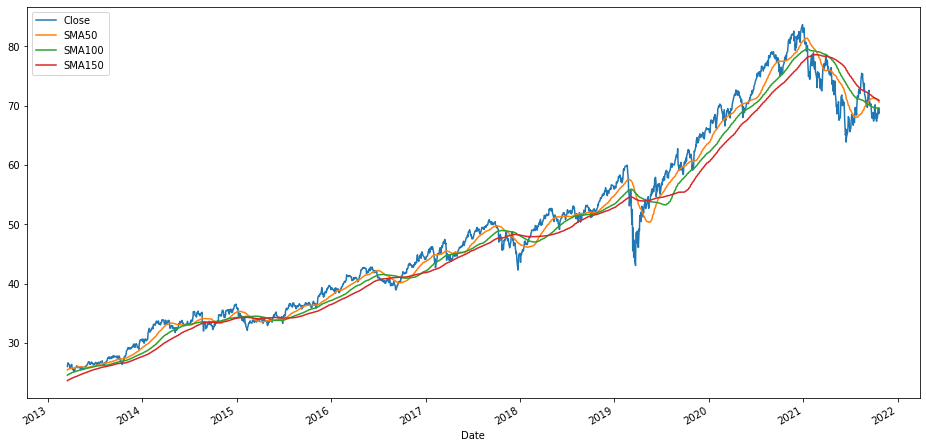

In [23]:

# removing all the NULL values using dropna() method
df1.dropna(inplace=True)
 
# plotting Close price and simple
# moving average of 30 days using .plot() method
df1[['Close', 'SMA50', 'SMA100', 'SMA150']].plot(label='VDY.TO')
plt.show()